Label 1 -> illicit
Label 2 -> licit

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import scipy as sp
import pickle as pkl

In [2]:
train_set = pd.read_csv('train_set.csv')
test_set = pd.read_csv('test_set.csv')
df_edges = pd.read_csv('elliptic_bitcoin_dataset/elliptic_txs_edgelist.csv')

In [3]:
df_subgraph = train_set[train_set['Time Step'] == 29]

In [6]:
def save_graph(graph, output_filename):
    # Save the graph as a pickle file
    with open(output_filename, "wb") as f:
        pkl.dump(graph, f)

def generate_graph(df_features, df_edges):
    i = 0
    G = nx.Graph()
    
    
    print("\nAdding nodes...\n")
    for _, row in df_features.iterrows():
        # Extract node ID and attributes
        print(i)
        node_id = row['txId']
        node_attributes = row.drop('txId').to_dict()
        
        # Add node to the graph with its attributes
        G.add_node(node_id, **node_attributes)
        i+= 1


    print("\nAdding edges...\n")
    i=0
    for _, row in df_edges.iterrows():
        G.add_edge(row['txId1'], row['txId2'])
        i+=1
        
    print("\nSuccessfully created the graph!")
    
    print("\nSaving the graph into a pickle file....\n")
    save_graph(G, output_filename='generated_graph.pkl')
    print("\nSuccessfully saved the graph!")
    
    return G


subgraph = generate_graph(df_subgraph, df_edges)


Adding nodes...

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272


KeyboardInterrupt: 

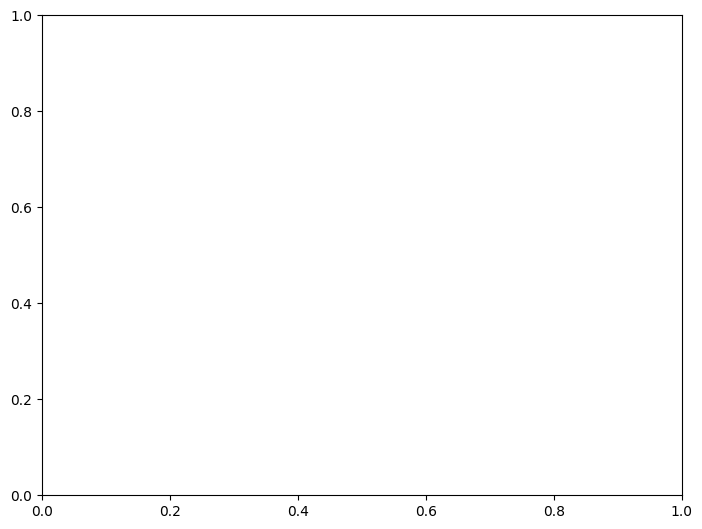

In [7]:
# Open the pickle file in binary mode
with open('generated_graph.pkl', 'rb') as f:
        # Load the data from the pickle file
        G = pkl.load(f)
        nx.draw(G, with_labels=False, node_color='skyblue', node_size=20, font_size=12)
        plt.show()

In [8]:
# Get the number of nodes
num_nodes = nx.number_of_nodes(G)

# Get the number of edges
num_edges = nx.number_of_edges(G)

print("Number of nodes:", num_nodes)
print("Number of edges:", num_edges)

Number of nodes: 203769
Number of edges: 234355


In [ ]:
def display_graph(df, graph, time_step):
    

In [10]:
# Specify the feature name and the desired feature value
time_step = 'Time step'

for value in  range(max(df_features['Time step'])):
    if value == 29:
        # Create a list of nodes that have the desired value in the specified feature
        desired_nodes = [node for node, data in G.nodes(data=True) if data.get(time_step) == value+1]
        sub_G = G.subgraph(desired_nodes)

        num_nodes = nx.number_of_nodes(sub_G)

        # Get the number of edges
        num_edges = nx.number_of_edges(sub_G)
        break

print("Number of nodes:", num_nodes)
print("Number of edges:", num_edges)

Number of nodes: 2483
Number of edges: 2561


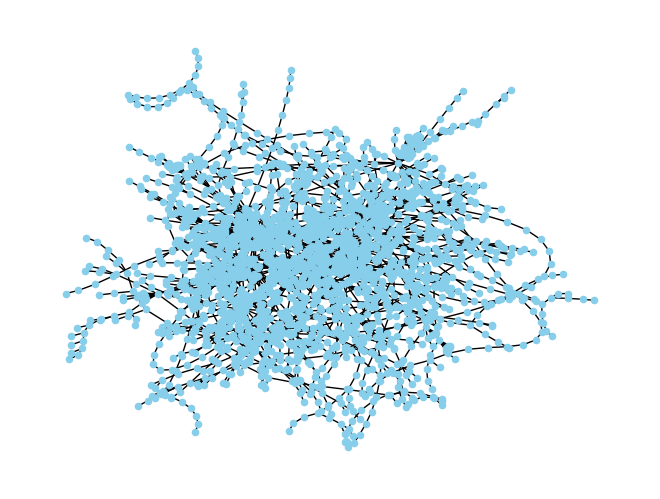

In [11]:
nx.draw(sub_G, with_labels=False, node_color='skyblue', node_size=20, font_size=12)
plt.show()

In [ ]:
def visualize_graph():
    pass